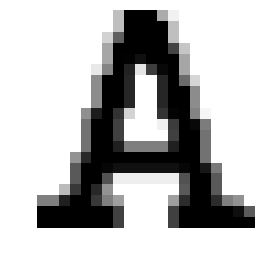

a

[0.97988737 0.98356615 0.98603122 0.97370583 0.98096026]
Our model's accuracy score based on the dataset trained is:
labels_pred mean:0.980830167754

Predicted text from image given: 
 i n a r e g u l a t o r y d o c u m e n t f i l e d w i t h t h e s e c t o d a y a d o b e a n n o u n c e d t h a t c h i e f t e c h n o l o g y o f f i c e r k e v i n l y n c h w o u l d b e t a k i n g h i s l e a v e a s o f t h i s c o m i n g f r i d a y o n m a r c h 1 8 2 o 1 3 k e v i n l y n c h r e s i g n e d f r o m h i s p o s i t i o n a s e x e c u t i v e v i c e p r e s i d e n t c h i e f t e c h n o l o g y o f f i c e r o f a d o b e s y s t e m s i n c o r p o r a t e d e f f e c t i v e m a r c h 2 2 2 o 1 3 t o p u r s u e o t h e r o p p o r t u n i t i e s t h e f i l i n g r e a d s l y n c h w h o c a m e t o t h e c o m p a n y i n 2 o o 5 d u r i n g i t s a c q u i s i t i o n o f m a c r o m e d i a l e d a d o b e s c h a r g e i n t o s o m e o f t h e m o r e c u 

In [17]:
#To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Necessary import for the programm to run smoothly
import numpy as np
import os
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)

#folder_string used to label our data
folder_string = '123456789abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyz'
#images and labels arrays are used to store the images and their labels
images = []
labels = []
#initialising page variable with the image adobe.png
page = imread('ocr/testing/adobe.png')

#for loops in order to populate both arrays (images and labels) with all the images and labeling them correctly,
#thus creating our dataset and allowing us to fit it to our KNN classifier.
for x in folder_string:
    folder_path = "type/" + x
    filenames = os.listdir(folder_path)
    for label in filenames:
        path = "type/" + x + "/" + label
        img = imread(path)
        images.append(img)
        labels.append(x)

#converting images and labels arrays to numpy arrays
images = np.array(images)
labels = np.array(labels)
samples, x, y = images.shape
#reshaping images array from 3 dimensions to 2.
images = images.reshape((samples, x*y))

#splitting the dataset to training and testing. 80% of data will be used for training and 20% will be used for testing
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=1, stratify=labels)

some_letter = images_train[363]
some_letter_image = some_letter.reshape(20, 20)
plt.imshow(some_letter_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

print(labels_train[363])
print("")

#defining an array that will hold the adobe.png image
pagearray = []

#method that will change the storage of each character and remove the text after the '_' so the images can be stored storted.
def onlyname(img):
    image = img.split('_')
    outputimage = int(image[0])
    return outputimage

#defyning the path were all the characters extracted from the adobe.png image are
listpath = os.listdir('textchars')
#applying the onlyname method on every image file name
listpath = map(onlyname, listpath)
#sorting the character images by filename
listpath.sort()

#for loop that will iterate through all image paths and insert them inside the pagearray array that will hold all the
#characters of the text
for i in listpath:
    path = "textchars/" + str(i) + "_snippet.png"
    img = imread(path)
    img = np.array(img)
    pagearray.append(img)
#Convert pagearray array to numpy array    
pagearray = np.array(pagearray)
#reshaping pagearray from 3d to 2d
samples, x, y = pagearray.shape
pagearray = pagearray.reshape((samples, x*y))
#Defyinin our KNN classifier, and specifying neighbours
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=1)
knn_clf.fit(images_train, labels_train)
#fit our classifier with the training data
labels_pred = cross_val_score(knn_clf, images, labels, cv=5)
#testing our classifier and printing out accuracy score
print(labels_pred)
print("Our model's accuracy score based on the dataset trained is:")
print('labels_pred mean:{}'.format(np.mean(labels_pred)))


#predicting the pagearray
image_pred = knn_clf.predict(pagearray)
print("")
print("Predicted text from image given: ")
prediction = " "
#printing out all predictions made for our adobe.png image.
for character in range(len(pagearray)):
    prediction += image_pred[character] + " "
print(prediction)
